In [1]:
from operator import itemgetter
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from random import randint
from scipy.stats import randint as sp_randint

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
os.chdir("/Users/dongminsun/Desktop")

In [3]:
play = pd.read_csv("model_plays.csv")

In [4]:
# with only "pass" & "run"
target_col = play.loc[play["target"].isin(["run","pass"])]

In [5]:
import seaborn as sns

tar = target_col.groupby(['target','yardline_100']).size().to_frame('occurences').reset_index()

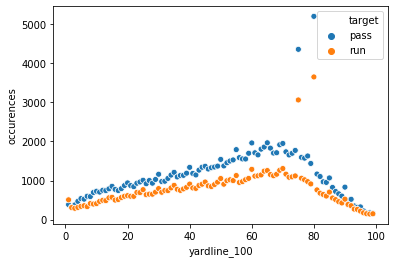

In [6]:
# show the best time for the each target / play

sns.scatterplot(x='yardline_100', y='occurences', hue='target', data=tar)

In [7]:
features = target_col.columns.values
#print(len(features))

y = target_col['target']
X = target_col[features[0:-8]]

In [8]:
from sklearn.model_selection import train_test_split 
  
# split into 80:20 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (155040, 94)
Number transactions y_train dataset:  (155040,)
Number transactions X_test dataset:  (38760, 94)
Number transactions y_test dataset:  (38760,)


# Decision Tree ( base model)
# by using random search

In [32]:
from sklearn.model_selection import GridSearchCV
from operator import itemgetter
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [42]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [9]:
print("-- 10-fold cross-validation \n")
dt_old = DecisionTreeClassifier(random_state=99,min_samples_split=20,)
dt_old.fit(X, y)

scores = cross_val_score(dt_old, X, y, cv=10)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

-- 10-fold cross-validation 

mean: 0.591 (std: 0.042)



That means that the average accuracy (percentage of correct classifications using the trained model) is 59%. That accuracy is pretty low, we can see if better parameters can be found.

In [34]:
# dict of parameter list/distributions to sample
param_dist = {"criterion": ["gini", "entropy"],
              "min_samples_split": randint(2, 20),
              "max_depth": randint(1, 20),
              "min_samples_leaf": sp_randint(2, 20),
              "max_leaf_nodes": randint(2, 20)}

In [37]:
n_iter_search = 10
random_search = RandomizedSearchCV(dt_old,
                                   cv = 10,
                                   n_iter=n_iter_search,
                                   param_distributions=param_dist,iid=False)


In [38]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeClassifier(min_samples_split=20,
                                                    random_state=99),
                   iid=False,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12604c690>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12604ca10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12604c490>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12604c890>})

In [39]:
#返回最优的训练器
best_estimator = random_search.best_estimator_
print(best_estimator)

DecisionTreeClassifier(criterion='entropy', max_depth=17, max_leaf_nodes=17,
                       min_samples_leaf=6, min_samples_split=6,
                       random_state=99)


In [46]:
# train the decision tree on the training data
from sklearn import tree   

dt_mod = tree.DecisionTreeClassifier(criterion='entropy', max_depth=17, max_leaf_nodes=17,
                       min_samples_leaf=6, min_samples_split=6,
                       random_state=99)

dt_mod = dt_mod.fit(X_train, y_train)

In [47]:
from sklearn import metrics
measure_performance(X_test, y_test, dt_mod, show_confussion_matrix=False)   #

Accuracy:0.644 

Classification report
              precision    recall  f1-score   support

        pass       0.69      0.72      0.71     23275
         run       0.56      0.52      0.54     15485

    accuracy                           0.64     38760
   macro avg       0.63      0.62      0.62     38760
weighted avg       0.64      0.64      0.64     38760
 



In [ ]:
# visualize the tree


# Decision Tree & Over-Sampling Model (SMOTE)

In [45]:
from imblearn.over_sampling import SMOTE, ADASYN

print("Before OverSampling, counts of label 'run': {}".format(sum(y_train == "run"))) 
print("Before OverSampling, counts of label 'pass': {} \n".format(sum(y_train == "pass"))) 

# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label 'run': {}".format(sum(y_train_res == "run")))
print("After OverSampling, counts of label 'pass': {}".format(sum(y_train_res == "pass")))  

Before OverSampling, counts of label 'run': 62612
Before OverSampling, counts of label 'pass': 92428 

After OverSampling, the shape of train_X: (184856, 94)
After OverSampling, the shape of train_y: (184856,) 

After OverSampling, counts of label 'run': 92428
After OverSampling, counts of label 'pass': 92428


In [48]:
from sklearn import metrics
measure_performance(X_train_res, y_train_res, dt_mod, show_confussion_matrix=False) 

Accuracy:0.631 

Classification report
              precision    recall  f1-score   support

        pass       0.61      0.72      0.66     92428
         run       0.66      0.54      0.59     92428

    accuracy                           0.63    184856
   macro avg       0.64      0.63      0.63    184856
weighted avg       0.64      0.63      0.63    184856
 



Conclusion:

# Random Forest (Base Model)

In [58]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor

# create random forest classifier model
rf_model = RandomForestClassifier()

In [59]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': randint(1, 20),
               'min_samples_split': randint(1, 20),
               'n_estimators': [130, 180, 230]}

In [ ]:
n_iter_search = 100
random_search_rf = RandomizedSearchCV(rf_model,cv = 10,
                          n_iter=n_iter_search,
                          param_distributions=random_grid,
                          iid=False,
                          random_state=2) 
 
#在训练集上训练
#grid.fit(X_train,np.ravel(trainlabel.values))
random_search_rf.fit(X_train, y_train)

#返回最优的训练器
best_estimator = random_search_rf.best_estimator_
print(best_estimator)

In [ ]:
# print winning set of hyperparameters
from pprint import pprint
pprint(rf_random.best_estimator_.get_params())

In [ ]:
rf_random.best_params_
rf_random.best_score_
rf_random.best_estimator_

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, return_train_score = True)

rf_score = pd.DataFrame(rf_random.cv_results_)

# Random Forest & Over-Sampling Model (SMOTE)

# Visualization

在ROC曲线中，以FPR为x轴，TPR为y轴。FPR指实际负样本中被错误预测为正样本的概率。TPR指实际正样本中被预测正确的概率。

在PR曲线中，以Recall为x轴，Precision为y轴。Recall与TPR的意思相同，而Precision指正确分类的正样本数占总正样本的比例。

AUC(Area Under Curve)即指曲线下面积占总方格的比例。有时不同分类算法的ROC曲线存在交叉，因此很多时候用AUC值作为算法好坏的评判标准。面积越大，表示分类性能越好。

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = dt_old.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')